In [1]:
import numpy as np
import os
import random, shutil
import glob

import warnings
warnings.simplefilter('ignore')

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.image import imread

from os import makedirs,listdir
from shutil import copyfile
from random import seed
from random import random
import keras 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D, Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics

In [2]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import shutil
import cv2
# # Load excel file containing class labels
# df = pd.read_csv('labels.csv')

# # Get list of image file names in folder
# image_folder = 'Bangla-mnist/'
# image_names = os.listdir(image_folder)

# # Split dataset into train and test sets
# train_names, test_names = train_test_split(image_names, test_size=0.2, random_state=42)

# # Create new train and test folders
# train_folder = 'bangla-mnist-dataset/train/'
# test_folder = 'bangla-mnist-dataset/test/'
# os.makedirs(train_folder, exist_ok=True)
# os.makedirs(test_folder, exist_ok=True)

# # Move images to train or test folders based on their class labels
# for name in train_names:
#     class_label = str(df.loc[df['filename'] == name, 'digit'].values[0])
#     src_path = os.path.join(image_folder, name)
#     dst_path = os.path.join(train_folder, class_label, name)
#     os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#     # Convert image to grayscale and save to destination folder
#     img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
#     cv2.imwrite(dst_path, img)

# for name in test_names:
#     class_label = str(df.loc[df['filename'] == name, 'digit'].values[0])
#     src_path = os.path.join(image_folder, name)
#     dst_path = os.path.join(test_folder, class_label, name)
#     os.makedirs(os.path.dirname(dst_path), exist_ok=True)
#     # Convert image to grayscale and save to destination folder
#     img = cv2.imread(src_path, cv2.IMREAD_GRAYSCALE)
#     cv2.imwrite(dst_path, img)




In [3]:
img_rows, img_cols = 70, 70
batch_size = 64
n_epochs = 50
n_classes = 10
val_split = 0.2
verbosity = 1
path = 'bangla-mnist-dataset/train/'
path_test = 'bangla-mnist-dataset/test/'
input_shape = (img_rows, img_cols, 1) #Grey
labels = ['0', '1','2','3','4','5','6','7','8','9']
seed = 10

In [4]:
# Create ImageDataGenerators for training and validation and testing
train_datagen = ImageDataGenerator(
    validation_split = val_split,
    rescale=1.0/255.0,
	width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    validation_split = val_split,
    rescale=1.0/255.0,
	width_shift_range=0.1, 
    height_shift_range=0.1, 
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)


In [5]:
# use the labels defined before to 
# find number of images belonging to each category
train_generator = train_datagen.flow_from_directory(
    directory = path,
    classes = labels,
    seed = seed,
    color_mode="grayscale",
    batch_size = batch_size, 
    class_mode='categorical',
    shuffle = True,
    target_size=(img_rows, img_cols),
    subset = 'training'
)

Found 46113 images belonging to 10 classes.


In [6]:
val_generator = val_datagen.flow_from_directory(
    directory = path,
    classes = labels,
    seed = seed,
    batch_size = batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle = True,
    target_size=(img_rows, img_cols),
    subset = 'validation'
)

Found 11523 images belonging to 10 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    directory = path_test,
    classes = labels,
    class_mode='categorical',
    color_mode="grayscale",
    seed = seed,
    batch_size = batch_size, 
    shuffle = True,
    target_size=(img_rows, img_rows)
)

Found 14409 images belonging to 10 classes.


Labels: ['0\\a00007', '0\\a00007', '0\\a00007', '0\\a00007', '0\\a00007']


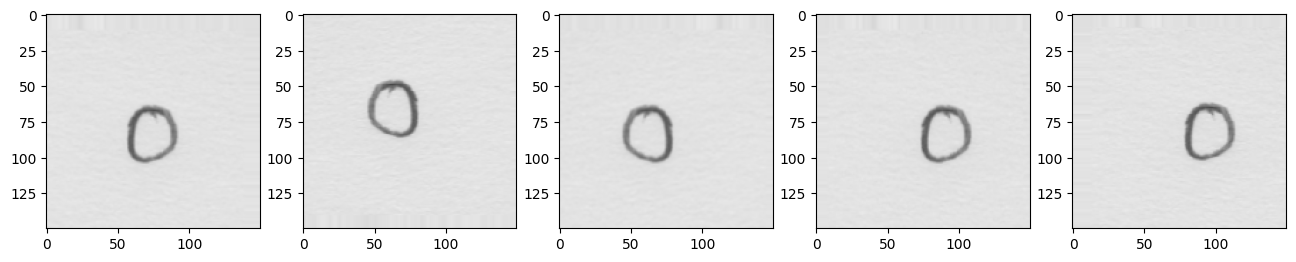

In [8]:
IMG_DIM = (150, 150)

train_files = glob.glob('./bangla-mnist-dataset/train/0/*')
train_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [".".join(fn.split('/')[3].split('.')[:-1]) for fn in train_files]
img_id = 0
cats_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cats = [next(cats_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cats])
l = [ax[i].imshow(cats[i][0][0]) for i in range(0,5)]

Labels: ['9\\a00009', '9\\a00009', '9\\a00009', '9\\a00009', '9\\a00009']


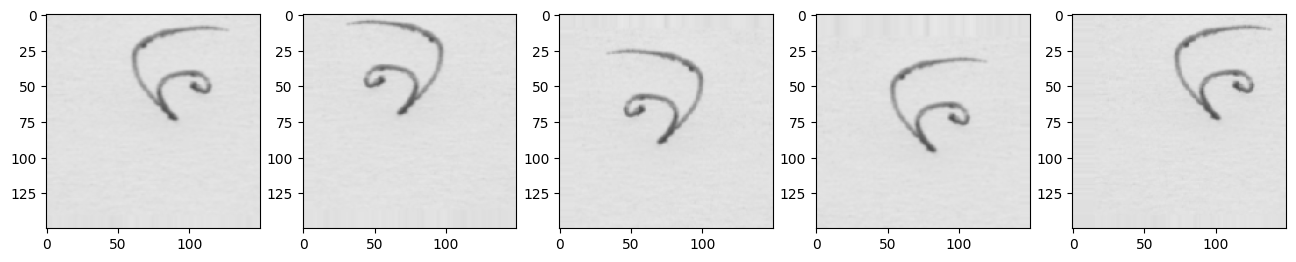

In [9]:
IMG_DIM = (150, 150)

train_files = glob.glob('./bangla-mnist-dataset/train/9/*')
train_imgs = [tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [".".join(fn.split('/')[3].split('.')[:-1]) for fn in train_files]
img_id = 0
cats_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cats = [next(cats_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cats])
l = [ax[i].imshow(cats[i][0][0]) for i in range(0,5)]

In [10]:
print(train_generator.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


In [11]:
classifier = Sequential()
classifier.add(Conv2D(32, (5, 5), padding='same', input_shape = input_shape, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
# classifier.add(Conv2D(128, (3, 3), padding='same', activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
# classifier.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
classifier.add(Dropout(0.25))
classifier.add(Flatten())
# classifier.add(Dense(units = 512, activation = 'relu'))
# classifier.add(Dropout(0.5))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 10, activation = 'softmax'))

In [12]:
classifier.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

In [13]:
history=classifier.fit(
  train_generator,
  validation_data=val_generator,
  epochs=n_epochs,workers=8
)

Epoch 1/50
721/721 [==============================] - 294s 405ms/step - loss: 2.2303 - accuracy: 0.1678 - val_loss: 2.2994 - val_accuracy: 0.1135
Epoch 2/50
721/721 [==============================] - 259s 358ms/step - loss: 2.0845 - accuracy: 0.2165 - val_loss: 2.3015 - val_accuracy: 0.1032
Epoch 3/50
721/721 [==============================] - 261s 361ms/step - loss: 2.0291 - accuracy: 0.2355 - val_loss: 2.3014 - val_accuracy: 0.1199
Epoch 4/50
721/721 [==============================] - 256s 355ms/step - loss: 2.0002 - accuracy: 0.2449 - val_loss: 2.3023 - val_accuracy: 0.1055
Epoch 5/50
721/721 [==============================] - 250s 346ms/step - loss: 1.9762 - accuracy: 0.2531 - val_loss: 2.3011 - val_accuracy: 0.1054
Epoch 6/50
721/721 [==============================] - 238s 330ms/step - loss: 1.9577 - accuracy: 0.2592 - val_loss: 2.3000 - val_accuracy: 0.1199
Epoch 7/50
721/721 [==============================] - 231s 319ms/step - loss: 1.9385 - accuracy: 0.2674 - val_loss: 2.2970 -

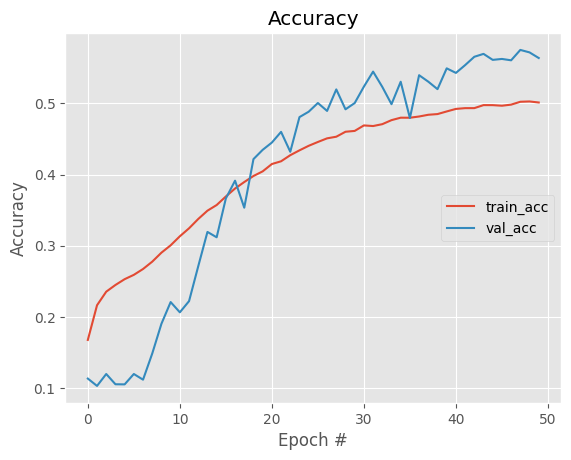

In [14]:
N = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="center right")

In [15]:
classifier.save('classifier.h5')

1/1 [==============================] - 0s 91ms/step
The predicted class is 4


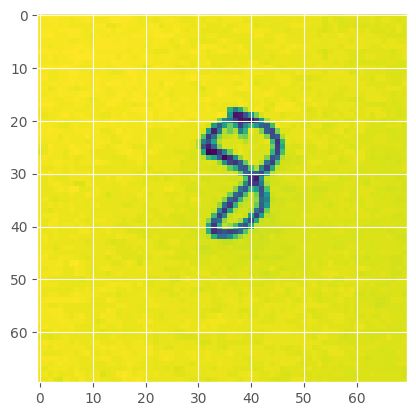

In [20]:
import numpy as np
from PIL import Image
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('classifier.h5')

# Load the image and preprocess it
image = Image.open('four.png').convert('L')  # Open the image and convert to grayscale
plt.imshow(image)
image = image.resize((70, 70))  # Resize the image to 28x28
plt.imshow(image)
image = np.array(image) / 255.0  # Convert the image to a numpy array and scale the pixel values to [0, 1]
image = image.reshape((1, 70, 70, 1))  # Reshape the array to the shape expected by the model
# Make a prediction
prediction = model.predict(image)

# Print the predicted class
predicted_class = np.argmax(prediction)
print(f"The predicted class is {predicted_class}")
